In [ ]:
!pip install scikit-learn


In [ ]:
!pip install numpy --upgrade
!pip install librosa --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#Run this cell once, then restart the runtime and run it again. The 2nd time it runs, the error is resolved

In [ ]:

!unzip -uq "/content/drive/MyDrive/SR/task3.zip" -d "/content/files/"

ESC50_path="/content/files/esc50.csv"
data = pd.read_csv(ESC50_path)
data.head(10)

# Load metadata, i.e. the esc file
meta = data


In [ ]:
# Important file directory paths
root_dir="/content/files/"
audio_dir=root_dir+"audio/audio/"

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Function to extract features related to bMel-frequency cepstral coefficients from a single file
def extract_features(file_path,A):
    y, sr = librosa.load(file_path, sr = A,  res_type='kaiser_fast' )
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean
# Extract features and labels
features = []
labels = []

for index, row in meta.iterrows():
    file_path = os.path.join(root_dir, audio_dir, row['filename'])
    if os.path.exists(file_path):
        mfccs = extract_features(file_path,None)
        features.append(mfccs)
        labels.append(row['category'])
    else:
        print(f"File {file_path} not found. Skipping.")

# Convert features to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
print(features)
print(labels)
#Features and labels are the respective inputs along which our model is trained.

[[-5.81739929e+02  8.20712185e+00 -6.65880251e+00 ...  4.61393446e-01
   3.62330154e-02  1.06095955e-01]
 [-2.54936310e+02  8.58396225e+01 -1.07103157e+02 ...  4.50450182e+00
   2.53173441e-01  9.59811449e-01]
 [-3.04612122e+01  1.02503899e+02 -4.04194374e+01 ...  3.73361087e+00
  -7.77458429e-01 -4.64624405e+00]
 ...
 [-3.32646027e+02  1.01332367e+02  3.85658526e+00 ... -6.31774843e-01
  -5.06125093e-01 -1.01628518e+00]
 [-1.93228912e+02  1.30766678e+02 -3.80895081e+01 ... -1.89012814e+00
  -2.24273539e+00 -1.35492766e+00]
 [-5.02338898e+02  2.36854382e+01 -3.08670959e+01 ...  1.01169419e+00
   5.33549130e-01 -4.28032249e-01]]
['dog' 'chirping_birds' 'vacuum_cleaner' ... 'footsteps' 'sheep' 'dog']


In [ ]:
labels=[]

for index, row in meta.iterrows():
    file_path = os.path.join(root_dir, audio_dir, row['filename'])
    if os.path.exists(file_path):
        # mfccs = extract_features(file_path,None)
        # features.append(mfccs)
        labels.append(row['category'])
    else:
        print(f"File {file_path} not found. Skipping.")

# Convert features to numpy arrays
# features = np.array(features)
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
# print(features)
print(labels)
#Features and labels are the respective inputs along which our model is trained.

['dog' 'chirping_birds' 'vacuum_cleaner' ... 'footsteps' 'sheep' 'dog']


In [ ]:
import cv2
import matplotlib.pyplot as plt
def spectrogram(audio_file, PT):
    y, sr = librosa.load(audio_file)

    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot the spectrogram
#     fig, ax = plt.subplots()
    librosa.display.specshow(spectrogram_db, sr=sr)

    plt.savefig('spectrogram.png')
    image = cv2.imread('spectrogram.png',0)
    left_crop = 100
    right_crop = 80
    top_crop = 57
    bottom_crop = 60

    # Crop the sides of the image
    image = image[top_crop:-bottom_crop, left_crop:-right_crop]
    if(PT):

     plt.imshow(image)
     plt.show()
    image = image.astype('float32') / 255.0   # Normalize pixel values
    print(image.shape)
    return image

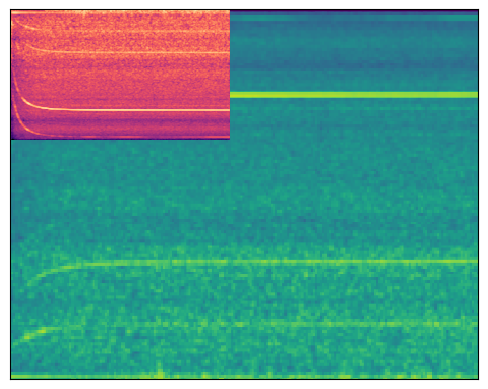

(363, 460)


array([[0.94509804, 0.94509804, 0.94509804, ..., 0.94509804, 0.94509804,
        0.94509804],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14117648, 0.14117648, 0.14117648, ..., 0.12941177, 0.13725491,
        0.13725491],
       ...,
       [0.80784315, 0.7882353 , 0.7882353 , ..., 0.69803923, 0.6901961 ,
        0.6901961 ],
       [0.80784315, 0.7882353 , 0.7882353 , ..., 0.69803923, 0.6901961 ,
        0.6901961 ],
       [0.70980394, 0.6862745 , 0.6862745 , ..., 0.6509804 , 0.64705884,
        0.64705884]], dtype=float32)

In [ ]:
spectrogram(audio_dir+'1-100210-A-36.wav',1)

In [ ]:
# print(features.shape)
print(labels_encoded)
num_labels=labels_encoded.shape[0]
print(num_labels)
#Now we can create a model for training wrt melspectrogram.

[18  7 46 ... 24 39 18]
2000


# Training Over 1D MFCC Value Array Vectors

In [ ]:
!pip install tensorflow
import tensorflow as tf
import keras
from keras import layers


In [ ]:
classify_model = keras.Sequential(
    [
        layers.Dense(800, input_shape=(40,),activation="relu", name="rel1"),
        layers.Dropout(0.2),
        layers.Dense(400, activation="relu", name="rel2"),
        layers.Dropout(0.2),
        layers.Dense(200, activation="relu", name="rel3"),
        layers.Dropout(0.25),
        layers.Dense(50, activation="softmax",name="soft"),
    ])
keras.utils.plot_model(classify_model,show_shapes=True)
classify_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rel1 (Dense)                (None, 800)               32800     
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 rel2 (Dense)                (None, 400)               320400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 rel3 (Dense)                (None, 200)               80200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 soft (Dense)                (None, 50)                1

In [ ]:



# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

# Train a classifier (SVM in this case)
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


                  precision    recall  f1-score   support

        airplane       0.31      0.62      0.42         8
       breathing       0.36      0.50      0.42         8
  brushing_teeth       0.50      0.29      0.36         7
     can_opening       0.45      0.62      0.53         8
        car_horn       0.33      0.33      0.33         3
             cat       0.38      0.25      0.30        12
        chainsaw       0.33      0.75      0.46         4
  chirping_birds       0.00      0.00      0.00         6
    church_bells       0.25      0.38      0.30         8
        clapping       0.58      0.64      0.61        11
     clock_alarm       1.00      0.25      0.40         8
      clock_tick       0.00      0.00      0.00         5
        coughing       0.43      0.30      0.35        10
             cow       0.56      0.38      0.45        13
  crackling_fire       0.21      0.33      0.26         9
        crickets       0.33      0.17      0.22         6
            c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classify_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.0025),metrics=["accuracy"])

n_epochs = 200              # set number of epochs
batch_size = 400            # you can tweak with these parametrs
history = classify_model.fit(X_train,y_train,batch_size = 200,
    epochs=n_epochs)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 5s 58ms/step - loss: 17.6425 - accuracy: 0.0206
Epoch 2/200
8/8 [==============================] - 0s 45ms/step - loss: 4.4529 - accuracy: 0.0362
Epoch 3/200
8/8 [==============================] - 1s 64ms/step - loss: 3.8971 - accuracy: 0.0237
Epoch 4/200
8/8 [==============================] - 0s 44ms/step - loss: 3.8350 - accuracy: 0.0450
Epoch 5/200
8/8 [==============================] - 0s 43ms/step - loss: 3.8050 - accuracy: 0.0437
Epoch 6/200
8/8 [==============================] - 0s 39ms/step - loss: 3.7590 - accuracy: 0.0500
Epoch 7/200
8/8 [==============================] - 0s 40ms/step - loss: 3.7134 - accuracy: 0.0644
Epoch 8/200
8/8 [==============================] - 0s 31ms/step - loss: 3.6293 - accuracy: 0.0781
Epoch 9/200
8/8 [==============================] - 0s 32ms/step - loss: 3.5709 - accuracy: 0.0913
Epoch 10/200
8/8 [==============================] - 0s 36ms/step - loss: 3.4671 - accuracy: 0.1125
Epoch 11/200
8/8 [============

13/13 [==============================] - 0s 4ms/step - loss: 4.5951 - accuracy: 0.5025
Loss =  4.595126628875732
Accuracy =  50.24999976158142 %


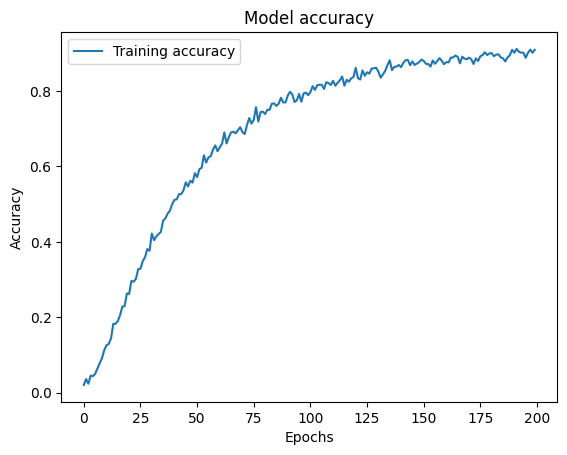

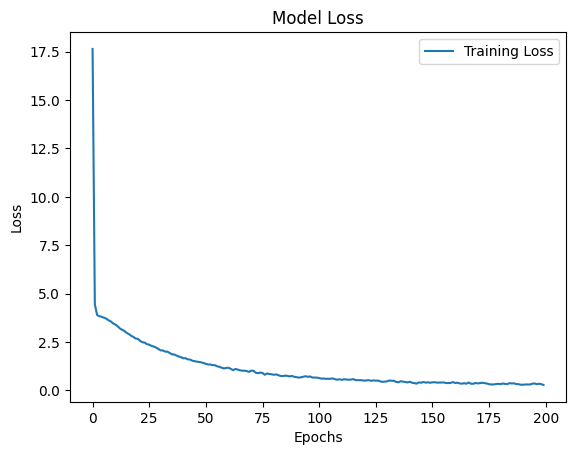

In [ ]:
import matplotlib.pyplot as plt
results = classify_model.evaluate(X_test, y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
features_44100 = []
labels_44100 = []
#Running the model with sampling freq rate =44100
for index, row in meta.iterrows():
    file_path = os.path.join(root_dir, audio_dir, row['filename'])
    if os.path.exists(file_path):
        mfccs = extract_features(file_path,44100)
        features_44100.append(mfccs)
        labels_44100.append(row['category'])
    else:
        print(f"File {file_path} not found. Skipping.")


features_44100 = np.array(features_44100)
labels_44100 = np.array(labels_44100)


le = LabelEncoder()
labels_encoded_44100 = le.fit_transform(labels_44100)
results = classify_model.evaluate(features_44100, labels_encoded_44100)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")


63/63 [==============================] - 0s 5ms/step - loss: 0.9861 - accuracy: 0.8820
Loss =  0.9860907196998596
Accuracy =  88.20000290870667 %


# CNN Model Training (Over 2D Matrices Vectors):

(363, 460)
1
(363, 460)
2
(363, 460)
3
(363, 460)
4
(363, 460)
5
(363, 460)
6
(363, 460)
7
(363, 460)
8
(363, 460)
9
(363, 460)
10
(363, 460)
11
(363, 460)
12
(363, 460)
13
(363, 460)
14
(363, 460)
15
(363, 460)
16
(363, 460)
17
(363, 460)
18
(363, 460)
19
(363, 460)
20
(363, 460)
21
(363, 460)
22
(363, 460)
23
(363, 460)
24
(363, 460)
25
(363, 460)
26
(363, 460)
27
(363, 460)
28
(363, 460)
29
(363, 460)
30
(363, 460)
31
(363, 460)
32
(363, 460)
33
(363, 460)
34
(363, 460)
35
(363, 460)
36
(363, 460)
37
(363, 460)
38
(363, 460)
39
(363, 460)
40
(363, 460)
41
(363, 460)
42
(363, 460)
43
(363, 460)
44
(363, 460)
45
(363, 460)
46
(363, 460)
47
(363, 460)
48
(363, 460)
49
(363, 460)
50
(363, 460)
51
(363, 460)
52
(363, 460)
53
(363, 460)
54
(363, 460)
55
(363, 460)
56
(363, 460)
57
(363, 460)
58
(363, 460)
59
(363, 460)
60
(363, 460)
61
(363, 460)
62
(363, 460)
63
(363, 460)
64
(363, 460)
65
(363, 460)
66
(363, 460)
67
(363, 460)
68
(363, 460)
69
(363, 460)
70
(363, 460)
71
(363, 460)
72
(

ValueError: Found array with dim 3. StandardScaler expected <= 2.

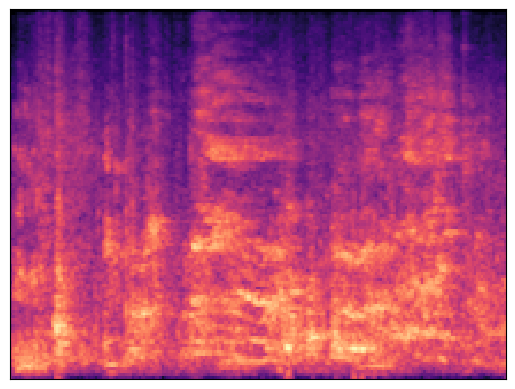

In [ ]:
_2Dfeatures=[]
from sklearn.preprocessing import StandardScaler
i=0
for index, row in meta.iterrows():
    file_path = os.path.join(root_dir, audio_dir, row['filename'])
    if (os.path.exists(file_path) and i<100):
        Array = spectrogram(file_path,0)
        _2Dfeatures.append(Array)
        i=i+1
        print(i)
    else:
        print(f"File {file_path} not found. Skipping.")
scaler = StandardScaler()
_2Dfeatures = np.array(_2Dfeatures)


In [ ]:
print(_2Dfeatures.shape)
labels_encoded_2=labels_encoded[:100]
X_train, X_test, y_train, y_test = train_test_split(_2Dfeatures, labels_encoded_2, test_size=0.2, random_state=42)

(100, 363, 460)


In [ ]:
_2Dmodel = keras.Sequential(
    [
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(363,460,3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(50, activation='softmax')
    ])


_2Dmodel.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.0025),metrics=["accuracy"])

_2Dmodel.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 361, 458, 64)      1792      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 180, 229, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 178, 227, 32)      18464     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 89, 113, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 87, 111, 32)       9248      
                                                                 
 flatten_10 (Flatten)        (None, 309024)          

In [ ]:
history = _2Dmodel.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on training data
loss, accuracy = _2Dmodel.evaluate(X_train, y_train)
print("Training Accuracy:", accuracy)